<a href="https://colab.research.google.com/github/kaystg/ANN/blob/main/NumberDetection(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
X_train=np.loadtxt('/content/sample_data/train_X.csv',delimiter=',').T
y_train=np.loadtxt('/content/sample_data/train_label.csv',delimiter=',').T
X_test=np.loadtxt('/content/sample_data/test_X.csv',delimiter=',').T
y_test=np.loadtxt('/content/sample_data/test_label.csv',delimiter=',').T

In [ ]:
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (784, 1000)
Shape of y_train: (10, 1000)
Shape of X_test: (784, 350)
Shape of y_test: (10, 350)


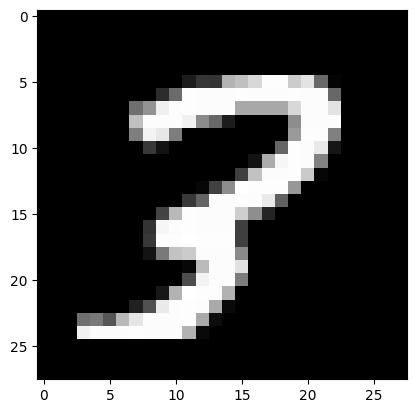

In [ ]:
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
def tanh(x):
  return np.tanh(x)
def relu(x):
  return np.maximum(x,0)
def softmax(x):
  x-=np.max(x,axis=0,keepdims=True)
  expX=np.exp(x)
  return expX/np.sum(expX,axis=0,keepdims=True)

In [ ]:
def derivative_tanh(x):
  return (1-np.power(np.tanh(x),2))
def derivative_relu(x):
  return np.array(x>0,dtype=np.float32)

In [ ]:
def initialize_parameters(n_x,n_h,n_y):
  w1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  w2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))
  parameters={
      "w1":w1,
      "b1":b1,
      "w2":w2,
      "b2":b2
  }
  return parameters

In [ ]:
def forward_propagation(x,parameters):
  w1=parameters["w1"]
  b1=parameters["b1"]
  w2=parameters["w2"]
  b2=parameters["b2"]
  z1=np.dot(w1,x)+b1
  a1=relu(z1)
  z2=np.dot(w2,a1)+b2
  a2=softmax(z2)
  forward_cache={
      "z1":z1,
      "a1":a1,
      "z2":z2,
      "a2":a2
  }
  return forward_cache

In [ ]:
def cost_function(a2,y):
  m=y.shape[1]
  a2=np.clip(a2,1e-10,1)
  cost=-(1/m)*np.sum(y*np.log(a2))
  #cost=-(1/m)*np.sum(np.sum(y*np.log(a2,0),1))
  return cost

In [ ]:
def backward_propagation(x,y,parameters,forward_cache):
  w1=parameters["w1"]
  b1=parameters["b1"]
  w2=parameters["w2"]
  b2=parameters["b2"]
  a1=forward_cache["a1"]
  a2=forward_cache["a2"]
  m=x.shape[1]
  dz2=(a2-y)
  dw2=(1/m)*np.dot(dz2,a1.T)
  db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
  dz1=(1/m)*np.dot(w2.T,dz2)*derivative_relu(a1)
  dw1=(1/m)*np.dot(dz1,x.T)
  db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
  gradients={
      "dw1":dw1,
      "db1":db1,
      "dw2":dw2,
      "db2":db2
  }
  return gradients

In [ ]:
a=np.array([[1,2,3],[1,2,3]])
np.sum(a,axis=1,keepdims=True).shape

(2, 1)

In [ ]:
def update_parameters(parameters,gradients,learning_rate):
  w1=parameters["w1"]
  b1=parameters["b1"]
  w2=parameters["w2"]
  b2=parameters["b2"]

  dw1=gradients["dw1"]
  db1=gradients["db1"]
  dw2=gradients["dw2"]
  db2=gradients["db2"]
  w1=w1-learning_rate*dw1
  b1=b1-learning_rate*db1
  w2=w2-learning_rate*dw2
  b2=b2-learning_rate*db2
  parameters={
      "w1":w1,
      "b1":b1,
      "w2":w2,
      "b2":b2
  }
  return parameters

In [ ]:
def model(x,y,n_h,learning_rate,iterations):
  n_x=x.shape[0]
  n_y=y.shape[0]
  cost_list=[]
  parameters=initialize_parameters(n_x,n_h,n_y)
  for i in range(iterations):
    forward_cache=forward_propagation(x,parameters)
    cost=cost_function(forward_cache["a2"],y)
    gradients=backward_propagation(x,y,parameters,forward_cache)
    parameters=update_parameters(parameters,gradients,learning_rate)
    cost_list.append(cost)
    if(i%(iterations/10)==0):
      print("Cost after",i,"iterations is",cost)
  return parameters,cost_list

In [ ]:
iterations=100
n_h=1000
learning_rate=0.02
Parameters,Cost_list=model(X_train,y_train,n_h=n_h,learning_rate=learning_rate,iterations=iterations)

Cost after 0 iterations is 9.29753851795002
Cost after 10 iterations is 3.6093677523305288
Cost after 20 iterations is 0.724094746550337
Cost after 30 iterations is 0.4471690031446152
Cost after 40 iterations is 0.14982019457087095
Cost after 50 iterations is 0.04912093759963951
Cost after 60 iterations is 0.03153962660384556
Cost after 70 iterations is 0.0015070725306439538
Cost after 80 iterations is 0.0008132253014261402
Cost after 90 iterations is 0.0005973488142473057


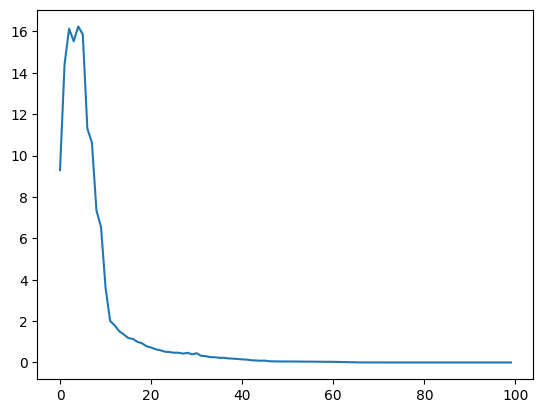

In [ ]:
t=np.arange(0,iterations)
plt.plot(t,Cost_list)
plt.show()

In [ ]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [ ]:
print("Accuracy of Train Dataset", accuracy(X_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, y_test, Parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 86.29 %


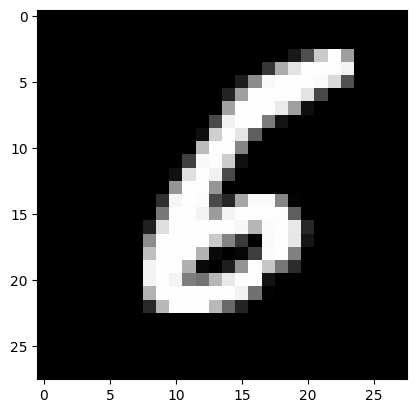

Our model says it is : 6


In [ ]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])